# Comparing different lexicons

Let's see how sentiment analysis results will change when we change the lexicon we use for finding out emotional words.

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from itertools import combinations
from sklearn.metrics import cohen_kappa_score
from statistics import mean

In [2]:
import warnings
warnings.simplefilter("ignore")

Also, some imports with Jupyter Notebook magic:

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1 &emsp; Loading data

The script that generated the datasets is stored at [extract_sentiment_from_plays.py](./extract_sentiment_from_plays.py).

In [4]:
df = pd.read_csv("./data/lexicons_experiment.csv", sep=";", encoding="utf-8")
df.head()

,play,lexicon,"spoken, total",spoken positive,"spoken positive, %",spoken negative,"spoken negative, %","stage, total",stage positive,"stage positive, %",stage negative,"stage negative, %"
0,andreyev-ne-ubiy,RuSentiLex,971,155,15.962925,287,29.557158,340,37,10.882353,67,19.705882
1,andreyev-ne-ubiy,EmoLex,971,335,34.500515,144,14.830072,340,57,16.764706,54,15.882353
2,andreyev-ne-ubiy,SentiRusColl,971,0,0.000000,0,0.000000,340,0,0.000000,0,0.000000
3,andreyev-ne-ubiy,LinisCrowd,971,140,14.418126,284,29.248198,340,36,10.588235,61,17.941176
4,andreyev-ne-ubiy,ChenSkiena,971,420,43.254377,131,13.491246,340,73,21.470588,49,14.411765


In [5]:
df_by_line = pd.read_csv("./data/lexicons_by_line.csv", sep=";", encoding="utf-8")
df_by_line.head()

,play,line,"line, lemmas",line type,RuSentiLex,EmoLex,LinisCrowd,ChenSkiena,ProductSentiRus,SentiRusColl
0,andreyev-ne-ubiy,"Что задумались, Василиса Петровна? Я пришел.",что задумываться василиса петровна я приходить,spoken,0,0,0,0,-1,0
1,andreyev-ne-ubiy,Да вот думаю все.,да вот думать все,spoken,0,1,0,0,-1,0
2,andreyev-ne-ubiy,"Ну, думайте.",ну думать,spoken,0,0,0,1,-1,0
3,andreyev-ne-ubiy,"Холодно. Да, вот думаю все. Ты знаешь, Яков, с...",холодно да вот думать все ты знать яков скольк...,spoken,0,1,0,-1,-1,0
4,andreyev-ne-ubiy,"Я частокольчик доломал, теперь дня на два топл...",я частокольчик доламывать теперь день на два т...,spoken,-1,-1,0,0,-1,0


## 2 &emsp; Share of "emotional" lines in plays

Let's visualise amounts of found emotional lines by play for each lexicon:

### 2.1 &emsp; Spoken text

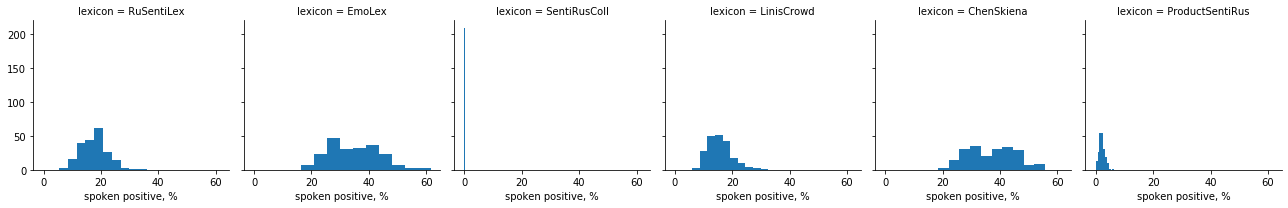

In [6]:
g = sns.FacetGrid(df, col="lexicon", palette=sns.cubehelix_palette(7, start=.8))
# plt.suptitle("Distribution of positive phrases in plays")
g.map(plt.hist, "spoken positive, %");
plt.savefig("./data/figures/spoken_positive_by_lexicon.png", dpi=600)

X-axis is a percentage of phrases in a play labeled positive, Y-axis is amount of plays with given percentage.

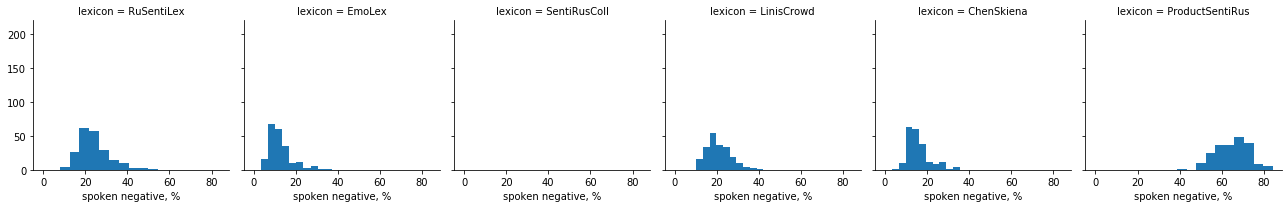

In [7]:
g = sns.FacetGrid(df, col="lexicon", palette=sns.color_palette("hls", 8))
g.map(plt.hist, "spoken negative, %");
plt.savefig("./data/figures/spoken_negative_by_lexicon.png", dpi=600)

### 2.2 &emsp; Stage directions

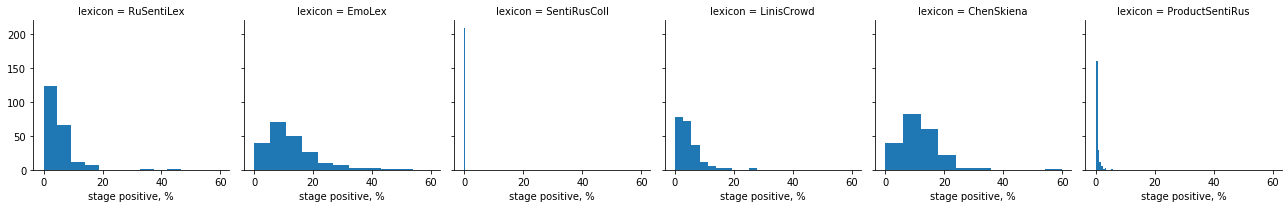

In [8]:
g = sns.FacetGrid(df, col="lexicon")
# plt.suptitle("Distribution of positive phrases in plays")
sns.set_palette(sns.cubehelix_palette(7, start=.8))
g.map(plt.hist, "stage positive, %");
plt.savefig("./data/figures/stage_positive_by_lexicon.png", dpi=600)

X-axis is a percentage of phrases in a play labeled positive, Y-axis is amount of plays with given percentage.

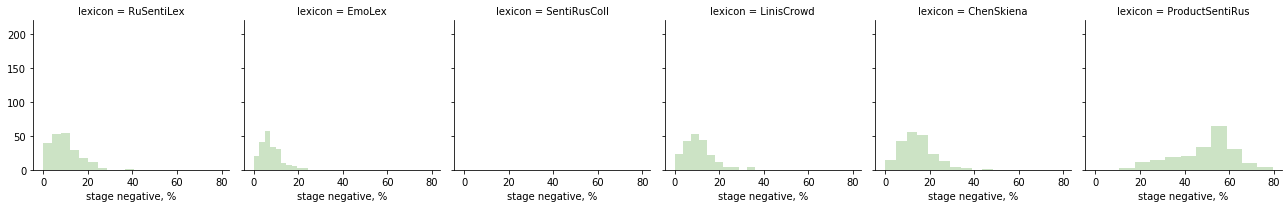

In [9]:
g = sns.FacetGrid(df, col="lexicon")
sns.set_palette(sns.color_palette("hls", 8))
g.map(plt.hist, "stage negative, %");
plt.savefig("./data/figures/stage_negative_by_lexicon.png", dpi=600)

### What can we get from these?

- stage directions are, in general, less emotional (as expected)

- results shown by EmoLex and Chen and Skiena's lexicons are quite the same, especially when looking at spoken text (this might be due to the fact that they are both Google Translate-based)

- ProductSentiRus shows way too much negative stage directions (needs a more proper check)

## 3 &emsp; Inter-lexicon agreement

In [10]:
lexicons = ["RuSentiLex", "EmoLex", "LinisCrowd", "ChenSkiena", "ProductSentiRus", "SentiRusColl"]
lexicons_pairs = []
for item in combinations(lexicons, 2):
    lexicons_pairs.append(item)
lexicons_pairwise = {pair: [] for pair in lexicons_pairs}

In [11]:
for play_name in df_by_line["play"].unique():
    print(play_name)
    try:
        kappas = []
        data_to_viz = df_by_line[df_by_line["play"] == play_name][lexicons]
        for pair in lexicons_pairs:
            k = cohen_kappa_score(data_to_viz[pair[0]], data_to_viz[pair[1]])
            kappas.append(k)
            lexicons_pairwise[pair].append(k)
            # print("\t", pair, k)
        # print("AVERAGE: {}".format(sum(kappas)/len(kappas)))
    except:
        print("ERROR")

andreyev-ne-ubiy
andreyev-mysl
andreyev-k-zvezdam
afinogenov-mashenka
babel-marija
babel-zakat
belsky-skazanie-o-nevidimom-grade-kitezhe
blok-balaganchik
blok-neznakomka
blok-korol-na-ploschadi
bulgakov-ivan-vasilevich
bulgakov-beg
bulgakov-zojkina-kvartira
bulgakov-poslednie-dni
bulgakov-poloumnyj-zhurden
bulgakov-dni-turbinyh
bulgakov-kabala-svjatosh
bulgakov-vojna-i-mir
bulgakov-batum
bulgakov-adam-i-eva
glinka-velzen
gogol-igroki
gogol-utro-delovogo-cheloveka
gogol-teatralnyi-razezd
gogol-tjazhba
gogol-otryvok
gogol-zhenitba
gogol-revizor
gogol-lakeiskaja
gorky-egor-bulychov-i-drugie
gorky-na-dne
gorky-vassa-zheleznova
griboyedov-molodye-suprugi
griboyedov-gore-ot-uma
gumilyov-akteon
gumilyov-ditja-allaha
gumilyov-gondla
gumilyov-don-zhuan-v-egipte
dashkova-toisiokov
ekaterina-vtoraja-o-vremja
ekaterina-vtoraja-iz-zhizni-rjurika
ekaterina-vtoraja-rasstroennaja-semja
zagoskin-blagorodnyj-teatr
kapnist-antigona
kapnist-yabeda
kedrin-rembrandt
knyazhnin-hvastun
knyazhnin-olga
knyazhni

In [12]:
lexicons_pairwise_mean = {
    lexicons_key: mean(lexicons_pairwise[lexicons_key]) for lexicons_key in lexicons_pairwise
}

Converting these into a Seaborn heatmap to visualise agreement:

In [13]:
M = np.zeros((len(lexicons), len(lexicons)))
for l_mean in lexicons_pairwise_mean:
    ind_1 = lexicons.index(l_mean[0])
    ind_2 = lexicons.index(l_mean[1])
    M[ind_1][ind_2] = lexicons_pairwise_mean[l_mean]

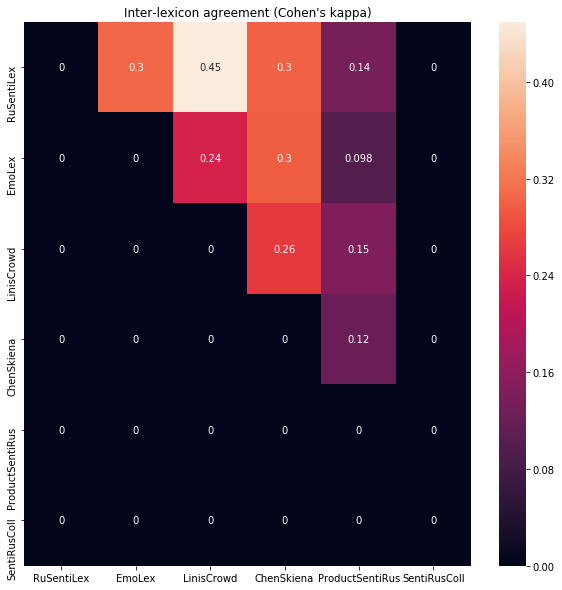

In [14]:
plt.figure(figsize=(10,10))
plt.title("Inter-lexicon agreement (Cohen's kappa)")
sns.heatmap(M, xticklabels=lexicons, yticklabels=lexicons, annot=True);
plt.savefig("./data/figures/inter_lexicon_agreement.png", dpi=600)

### 3.1 &emsp; How many lines in each play were annotated the same way for all five lexicons?

Positive lines:

In [15]:
positive_df = df_by_line[(df_by_line["RuSentiLex"] > 0) & (df_by_line["EmoLex"] > 0) & (df_by_line["LinisCrowd"] > 0)
          & (df_by_line["ChenSkiena"] > 0)]
positive_df.head()
positive_df["line, lemmas"].to_csv("./positive_lines_lemmas.txt", index=False)

,play,line,"line, lemmas",line type,RuSentiLex,EmoLex,LinisCrowd,ChenSkiena,ProductSentiRus,SentiRusColl
114,andreyev-ne-ubiy,Вот и я к вам. Да милая ж вы моя Василиса Петр...,вот и я к вы да милый ж вы мой василиса петров...,spoken,1,1,1,1,1,0
519,andreyev-ne-ubiy,Чудесная свадьба!,чудесный свадьба,spoken,1,1,1,1,1,0
925,andreyev-ne-ubiy,"Кто идут? Яшенька, голубчик, милый, спрячь мен...",кто идти яшенька голубчик милый спрятать я спр...,spoken,1,1,1,1,1,0
1577,andreyev-mysl,"Вы милый, Антон Игнатьич, вы милый! -- Кто это?",вы милый антон игнатьич вы милый кто это,spoken,1,1,1,1,1,0
1585,andreyev-mysl,"Нет, ничего. Милый! Так, не знаю. Алексей звон...",нет ничто милый так не знать алексей звонить и...,spoken,1,1,1,1,1,0


Negative lines:

In [18]:
negative_df = df_by_line[(df_by_line["RuSentiLex"] == -1) & (df_by_line["EmoLex"] == -1) & (df_by_line["LinisCrowd"] == -1)
          & (df_by_line["ChenSkiena"] == -1)]
negative_df["line, lemmas"].to_csv("./data/negative_lines_lemmas.txt", index=False)
negative_df.head()

,play,line,"line, lemmas",line type,RuSentiLex,EmoLex,LinisCrowd,ChenSkiena,ProductSentiRus,SentiRusColl
46,andreyev-ne-ubiy,"Яна тебя уж так полагаюсь... Яша, а аду ты бои...",яна ты уж так полагаться яша а ад ты бояться,spoken,-1,-1,-1,-1,-1,0
88,andreyev-ne-ubiy,"Иди. Закон не запрещает. А нет ужина, нет дене...",идти закон не запрещать а нет ужин нет деньги ...,spoken,-1,-1,-1,-1,-1,0
96,andreyev-ne-ubiy,Сплю. Совершенно спокойно. Зачем мне беспокоит...,спать совершенно спокойно зачем я беспокоиться...,spoken,-1,-1,-1,-1,-1,0
102,andreyev-ne-ubiy,"Врешь! Зверь на четвереньках ходит, а я челове...",врать зверь на четвереньки ходить а я человек ...,spoken,-1,-1,-1,-1,-1,0
189,andreyev-ne-ubiy,"Яша! Смотри, Яшенька, сюртучок надел. Вот же н...",яша смотреть яшенька сюртучок надевать вот же ...,spoken,-1,-1,-1,-1,-1,0


## 3 &emsp; Epification

We have proven that Russian drama is also prone to epification. Let's check it with sentiment analysis.

In [19]:
play_years = pd.read_csv("./data/rusdracor/play_years.csv", encoding="utf-8", sep=",")
play_years.head()

,play_name,year
0,andreyev-ne-ubiy,1913
1,andreyev-mysl,1914
2,andreyev-k-zvezdam,1906
3,afinogenov-mashenka,1941
4,babel-zakat,1927


In [20]:
def assign_year(play):
    return play_years[play_years["play_name"] == play]["year"].values[0]

In [21]:
df_with_years = deepcopy(df)

In [22]:
df_with_years["year"] = df_with_years["play"].apply(assign_year)
df_with_years["stage emotion, %"] = df_with_years["stage positive, %"] + df_with_years["stage negative, %"]
df_with_years.head()

,play,lexicon,"spoken, total",spoken positive,"spoken positive, %",spoken negative,"spoken negative, %","stage, total",stage positive,"stage positive, %",stage negative,"stage negative, %",year,"stage emotion, %"
0,andreyev-ne-ubiy,RuSentiLex,971,155,15.962925,287,29.557158,340,37,10.882353,67,19.705882,1913,30.588235
1,andreyev-ne-ubiy,EmoLex,971,335,34.500515,144,14.830072,340,57,16.764706,54,15.882353,1913,32.647059
2,andreyev-ne-ubiy,SentiRusColl,971,0,0.000000,0,0.000000,340,0,0.000000,0,0.000000,1913,0.000000
3,andreyev-ne-ubiy,LinisCrowd,971,140,14.418126,284,29.248198,340,36,10.588235,61,17.941176,1913,28.529412
4,andreyev-ne-ubiy,ChenSkiena,971,420,43.254377,131,13.491246,340,73,21.470588,49,14.411765,1913,35.882353


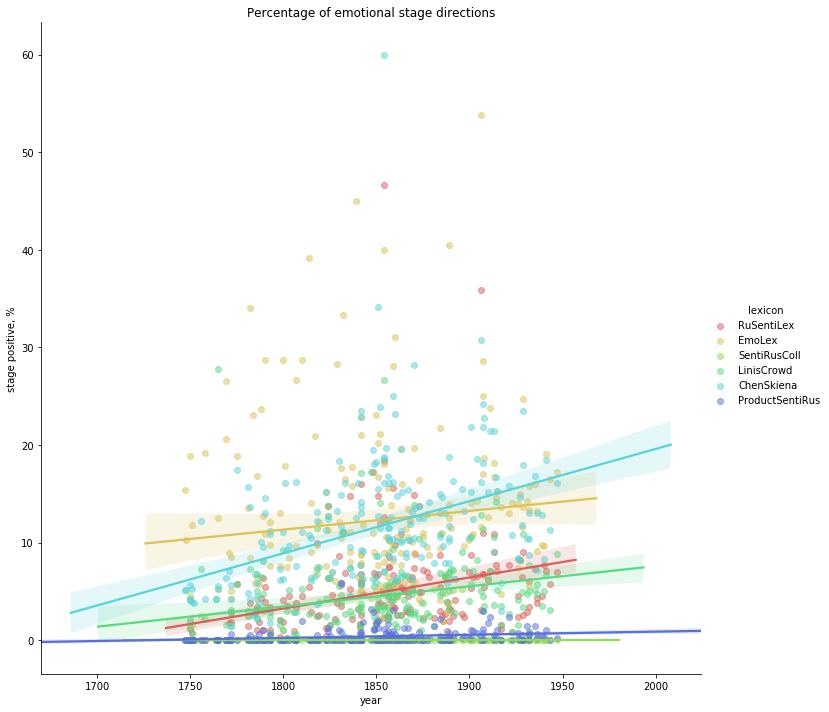

In [23]:
g = sns.FacetGrid(df_with_years, hue="lexicon", height=10)
plt.title("Percentage of emotional stage directions")
g.map(sns.regplot, "year", "stage positive, %", scatter_kws={'alpha':0.5})
g.add_legend();
plt.savefig("./data/figures/emotional_percentage.png", dpi=600)

Looks like I was right in my [3rd year BA assumptions](https://github.com/creaciond/russian-drama) — epification really does take place in Russian drama!